# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:
sensor.head(2)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [8]:
null_cols = sensor.isnull().sum()
# there is no null cols

In [10]:
# now we remove possible nans
sensor.dropna()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [12]:
# Your code here:
print("our sensor dataframe has the size of: ", sensor.shape)

our sensor dataframe has the size of:  (1751, 12)


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [14]:
# Your code here:
index_list=pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751)

Assign the time series index to the dataframe's index.

In [35]:
# Your code here:
sensor.index=pd.DatetimeIndex(index_list, freq="infer")

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

Figure(432x288)
Figure(432x288)


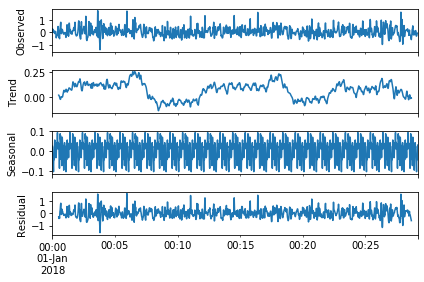

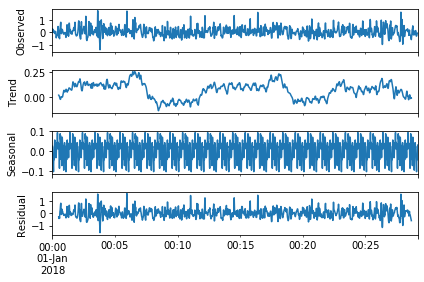

In [36]:
%matplotlib inline

# Your code here:
import statsmodels.api as sm

res_userAcceleration = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"],freq=60)
#print(res.seasonal)
print(res_userAcceleration.plot())
res_rotationRate = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"],freq=60)
#print(res.seasonal)
print(res_rotationRate.plot())

# there's no difference to the naked eye about this 2 graphs

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

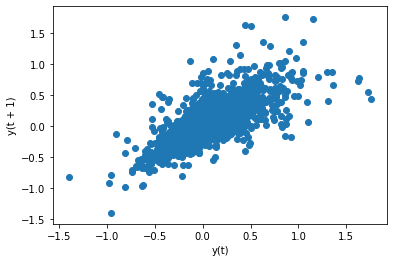

In [37]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration.x"])
# all right. at first approach, i see some linear tendence

# lag_plot te muestra cómo se parecen los puntos a los mismos puntos en la frecuencia siguiente (que le 
# hemos metido anteriormente (o el t+1)))

Create a lag plot for `rotationRate.x`

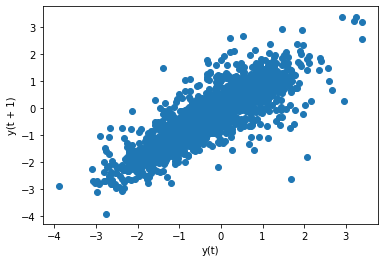

In [38]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate.x"])


What are your conclusions from both visualizations?

# Your conclusions here:

- al comienzo la predicción se ajusta mucho más que al final, donde se alejan


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [42]:
# Your code here:

import statsmodels.tsa.stattools as stools 

stools.adfuller(sensor["userAcceleration.x"], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-17.957994086169748,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [43]:
stools.adfuller(sensor["rotationRate.x"], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.26986062508642,
 6.320230335912249e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

# Your conclusions here:
- The p-value is greater than 0.05. Therefore, with a 95% confidence interval, we do not reject the null hypothesis and conclude that the data is not stationary.
- Eso dice la learning... No me da confianza la learning (no digo que esto esté mal, digo que no me da confianza). He mirado en la documentación de adfuller y la definición que tienen de p-value es la siguiente:
    - MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).
    - no he encontrado información accesible al respecto, pero ahí está el significado real cuando tenga tiempo

-------------

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [63]:
# debería haber importado desde el comienzo statsmodels y ya está
#test=sensor["userAcceleration.x"][1740:]
#train=sensor["userAcceleration.x"][:1740]
# Espero que Fran me corrija esto y se le llenen los ojos de lágrimas por la ilusión de ver que he dejado
# de hacer listas 


#esta es la forma molona:
train, test = sensor["userAcceleration.x"][:-10], sensor["userAcceleration.x"][-10:]


In [64]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)

# esto tiene que ser así, quiero saber por qué, pero quiero irme a casa
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

In [70]:
from uncertainties import ufloat

In [73]:
df=pd.DataFrame({"test":test,"prediction":predictions_ARMA})

In [76]:
# estoy intentado usar la librería de uncertainties para que me de el intervalo de error de la aproximación real y la estimada
# (cosas de vargas), pero no me sale y así a priori y no le quiero dedicar más tiempo

#uncertainty=ufloat(df["test"],df["predictions_ARMA"])

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [77]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions_ARMA)
# esto es la media del error cuadrático de todas las columnas

0.2252986376457943